# In this project, we will look at the sales data from an electronics store, Analyze it, & Try to answer the following questions:
- What was the best month for sales? How much was earned that month?
- What city sold the most product?
- What time should we display advertisements to maximize likelihood of customers buying products?
- What products are most often sold together?
- What product sold the most? Why do you think it sold the most?
- Does the price have an effect on the quantity ordered?

# Summary of findings:
- December was the best month for sales, with over 4.6 million USD.
- San Francisco was, by far, the city that sold the most products.
- I would recommend the best times to show ads to be slightly before 11am or 7pm everyday.
- The two pairs of products that were most often sold together were [ The iPhone, The Lightning Charging Cable ] & [ The Google Phone, The USB-C Charging Cable ].
- The 4-Pack of AAA and AA batteries were the most sold items, probably due to their low price.
- It seems that the higher an item's price gets, the less order quantityit has, which makes sense, The only items that may break that pattern a little bit are [ The iPhone, The Macbook Pro Laptop, & The Google Phone ], which can be explained by the poularity of these products and their brands.

___
# Data Reading and Initial Exploration
___

In [1]:
import os, pandas as pd, numpy as np

path = "Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_data = pd.concat([all_data, current_data])    


In [2]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


___
# Cleaning Data
___

In [3]:
nan_df = all_data[all_data.isna().all(axis=1)]

print(all_data.shape)
print(nan_df.shape)

(186850, 6)
(545, 6)


In [4]:
all_data = all_data.dropna(how='all')

In [5]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [6]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

In [7]:
all_data.shape

(185950, 6)

In [8]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [9]:
all_data['Month'] = pd.to_datetime(all_data['Order Date']).dt.month
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [10]:
def get_city(x):
    return (x.split(',')[1]).strip()
def get_state(x):
    return ((x.split(',')[2]).strip())[0:2]

all_data['City'] = all_data['Purchase Address'].apply(lambda x : f'{get_city(x)} ({get_state(x)})')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


# Data Analysis & Visualization
___
# What was the best month for sales? How much was earned that month?
___

In [11]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99


In [12]:
all_data.groupby(all_data['Month']).sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


In [13]:
import matplotlib.pyplot as plt

In [14]:
monthly_sales = all_data.groupby(all_data['Month']).sum().sort_values(by='Sales',ascending=False)
monthly_sales

,Quantity Ordered,Price Each,Sales
Month,,,
12,28114,4588415.41,4613443.34
10,22703,3715554.83,3736726.88
4,20558,3367671.02,3390670.24
11,19798,3180600.68,3199603.20
5,18667,3135125.13,3152606.75
3,17005,2791207.83,2807100.38
7,16072,2632539.56,2647775.76
6,15253,2562025.61,2577802.26
8,13448,2230345.42,2244467.88


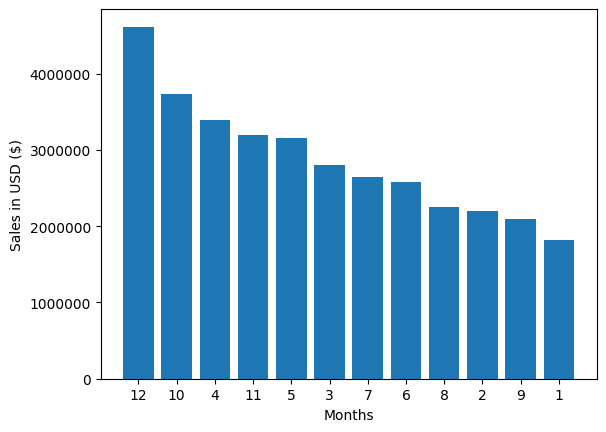

In [15]:
months = list(monthly_sales.index.astype('str'))
sales = list(monthly_sales.Sales)

from matplotlib.ticker import FormatStrFormatter
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))


plt.bar(months, sales)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in USD ($)')
plt.show()

___
# What city sold the most product?
___

In [16]:
sales_by_city = all_data.groupby(all_data['City']).sum().sort_values(by='Sales',ascending=False)
sales_by_city

,Quantity Ordered,Price Each,Month,Sales
City,,,,
San Francisco (CA),50239,8211461.74,315520,8262203.91
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Boston (MA),22528,3637409.77,141112,3661642.01
Atlanta (GA),16602,2779908.20,104794,2795498.58
Dallas (TX),16730,2752627.82,104620,2767975.40
Seattle (WA),16553,2733296.01,104941,2747755.48
Portland (OR),11303,1860558.22,70621,1870732.34
Austin (TX),11153,1809873.61,69829,1819581.75


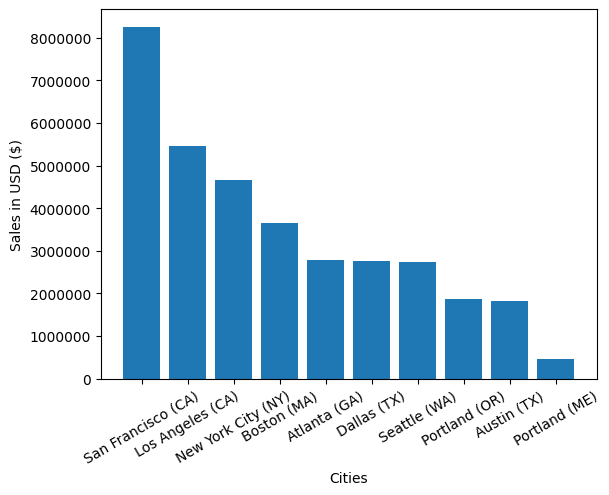

In [17]:
cities = list(sales_by_city.index)
sales = list(sales_by_city.Sales)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.bar(cities, sales)
plt.xticks(cities, rotation=30)
plt.xlabel('Cities')
plt.ylabel('Sales in USD ($)')
plt.show()

___
# What time should we display advertisements to maximize likelihood of customers buying products?
___

In [18]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99


In [19]:
all_data['Purchase Timing (Hrs)'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Purchase Timing (Mins)'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1

In [20]:
all_data['No. of Orders'] = all_data['Count']
all_data = all_data.drop(columns='Count')

In [21]:
highest_puchase_activity = all_data.groupby(all_data['Purchase Timing (Hrs)']).sum()
highest_puchase_activity

,Quantity Ordered,Price Each,Month,Sales,Purchase Timing (Mins),No. of Orders
Purchase Timing (Hrs),,,,,,
0,4428,709296.70,27554,713721.27,103596,3910
1,2619,458490.00,16657,460866.88,61807,2350
2,1398,233833.64,8507,234851.44,32508,1243
3,928,144726.42,5904,145757.89,23044,831
4,937,162058.18,6148,162661.01,26876,854
5,1493,229621.21,9301,230679.82,42877,1321
6,2810,445000.11,17539,448113.00,80343,2482
7,4556,740568.11,28850,744854.12,127447,4011
8,7002,1185970.62,43626,1192348.97,198135,6256


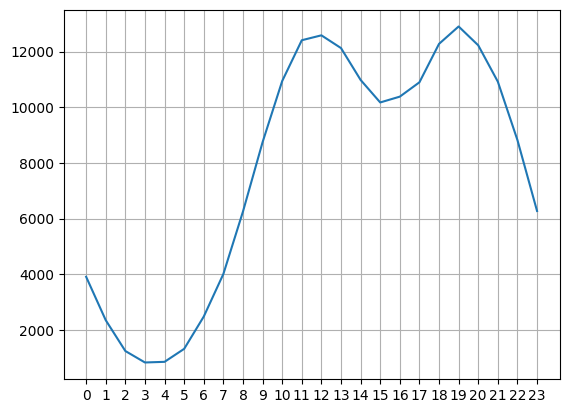

In [22]:
hours = list(highest_puchase_activity.index.astype('str'))
orders = list(highest_puchase_activity['No. of Orders'])
plt.plot(hours, orders)
plt.xticks(hours)
plt.grid()
plt.show()

I would recommend the best times to show ads to be slightly before 11am or 7pm

___
# What products are most often sold together?
___

In [23]:
all_data = all_data.head(len(all_data)).set_index('Order ID')
all_data = all_data.drop_duplicates()
all_data.drop(columns= 'No. of Orders', inplace=True)
all_data.reset_index(inplace=True)

In [24]:
display(all_data.head())
all_data.shape

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Purchase Timing (Hrs),Purchase Timing (Mins)
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8,46
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22,30
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,9,27


(185686, 11)

In [25]:
df = all_data[all_data.duplicated(subset='Order ID', keep=False)].sort_values(by='Order ID')[['Order ID','Product']]
df.set_index('Order ID', inplace=True)
df

,Product
Order ID,
141275,USB-C Charging Cable
141275,Wired Headphones
141290,Apple Airpods Headphones
141290,AA Batteries (4-pack)
141365,Vareebadd Phone
...,...
319584,Wired Headphones
319596,iPhone
319596,Lightning Charging Cable


In [26]:
df['Bought Together'] = df.groupby('Order ID').transform(lambda x : ','.join(x))
df.reset_index(inplace=True)
df.drop_duplicates(subset= 'Order ID' ,inplace=True)
df.drop(columns='Product', inplace=True)

In [27]:
from itertools import combinations
from collections import Counter
count = Counter()

for row in df['Bought Together']:
    items = row.split(',')
    count.update(Counter(combinations(items, 2)))

for k,v in count.most_common(10):
    print(k,v)

('iPhone', 'Lightning Charging Cable') 772
('Google Phone', 'USB-C Charging Cable') 720
('iPhone', 'Wired Headphones') 326
('Google Phone', 'Wired Headphones') 312
('iPhone', 'Apple Airpods Headphones') 283
('USB-C Charging Cable', 'Google Phone') 277
('Vareebadd Phone', 'USB-C Charging Cable') 276
('Lightning Charging Cable', 'iPhone') 239
('Google Phone', 'Bose SoundSport Headphones') 169
('Wired Headphones', 'iPhone') 136


___
# What product sold the most? Why do you think it sold the most?
___

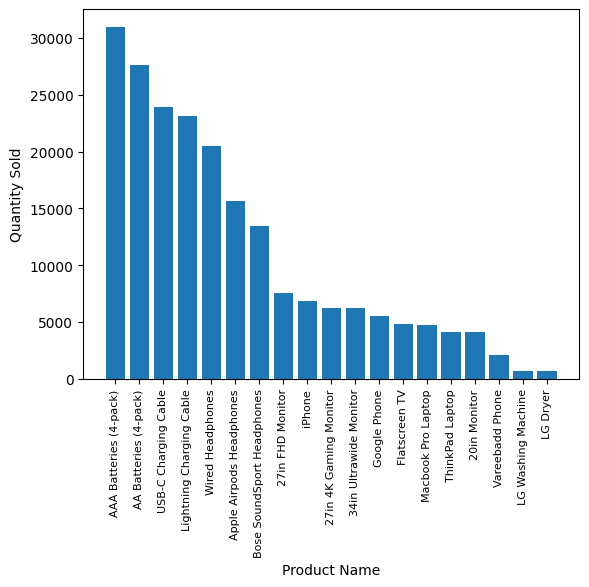

In [28]:
quantity_ordered = all_data.groupby('Product').sum().sort_values(by='Quantity Ordered', ascending=False)['Quantity Ordered']
products = list(quantity_ordered.index)
quantity_ordered = list(quantity_ordered.values)

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation=90, size=8)
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.show()

The 4-Pack of AAA and AA batteries were the most sold items, probably due to their low price
___

# Does the price have an effect on the quantity ordered?

C:\Temp\ipykernel_15052\608070009.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation=90, size=8)
C:\Temp\ipykernel_15052\608070009.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


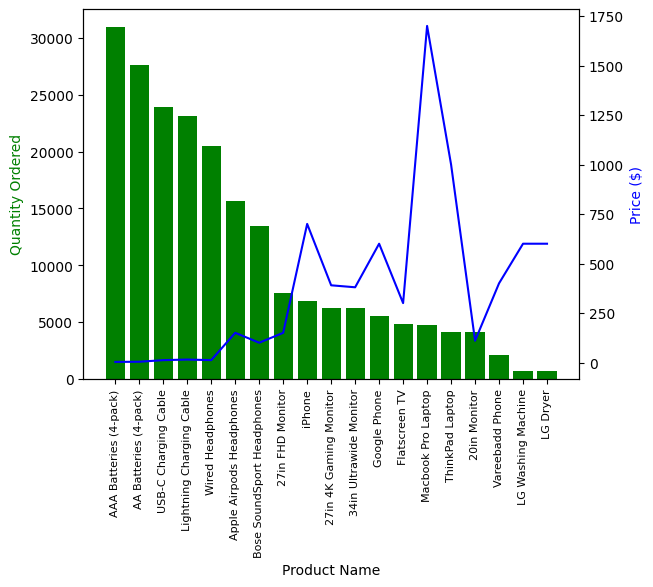

In [30]:
prices = all_data[['Product','Price Each']].drop_duplicates()
quantity = all_data.groupby('Product').sum().sort_values(by='Quantity Ordered', ascending=False).reset_index()[['Product','Quantity Ordered']]
new_prices = quantity.merge(prices, on='Product')['Price Each']

fig, ax1 = plt.subplots()

ax1.bar(products, quantity_ordered, color='g')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax1.set_xticklabels(products, rotation=90, size=8)

ax2 = ax1.twinx()
ax2.plot(products, new_prices, color='b')
ax2.set_ylabel('Price ($)', color='b')

fig.show()

It seems that the higher an item's price gets, the less order quantityit has, which makes sense, The only items that may break that pattern a little bit are [The iPhone, The Macbook Pro Laptop, & The Google Phone], which can be explained by the poularity of these products and their brands